In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
data_train = pd.read_csv('AVI Dataset/train.csv.zip')

In [4]:
data_train.head()

Id                                              Title   
0  197234  Drop\stop mobile data connection (non-wifi) by...  \
1  114800  How to automatically crop text messages when S...   
2  124532        Can't find text message that was to a group   
3  193875           Can't store contacts on my Android phone   
4   50332  Dropbox on Samsung Galaxy - where is the Setti...   

                                                Body  Score  ViewCount   
0  <p>Can I set Android 4.4.2 to drop mobile data...      0         34  \
1  <p>Is there a way to prevent the Messages app ...      0        836   
2  <p>When John Doe texts to a group that include...      1         28   
3  <p>I was going through all of my installed app...      0        158   
4  <p>On a Sony Xperia, the settings button in Dr...      1        963   

     Label  LabelNum  
0  android         0  
1  android         0  
2  android         0  
3  android         0  
4  android         0

In [15]:
# Dimensions of the dataset
print("Dimensions of the dataset:", data_train.shape)

# Display the first few rows
print("First few rows of the dataset:")
print(data_train.head())

# Check data types and null values
print("Data types and null values:")
print(data_train.info())

Dimensions of the dataset: (51370, 9)
First few rows of the dataset:
       Id                                              Title   
0  197234  Drop\stop mobile data connection (non-wifi) by...  \
1  114800  How to automatically crop text messages when S...   
2  124532        Can't find text message that was to a group   
3  193875           Can't store contacts on my Android phone   
4   50332  Dropbox on Samsung Galaxy - where is the Setti...   

                                                Body  Score  ViewCount   
0  <p>Can I set Android 4.4.2 to drop mobile data...      0         34  \
1  <p>Is there a way to prevent the Messages app ...      0        836   
2  <p>When John Doe texts to a group that include...      1         28   
3  <p>I was going through all of my installed app...      0        158   
4  <p>On a Sony Xperia, the settings button in Dr...      1        963   

     Label  LabelNum  Title_Length  Body_Length  
0  android         0             7           34  
1

In [6]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data_train.describe())


Summary statistics for numerical columns:
                  Id         Score     ViewCount      LabelNum
count   51370.000000  51370.000000  5.137000e+04  51370.000000
mean   136316.053163      2.156726  7.984175e+03      0.276757
std     94556.514006      5.967886  3.746801e+04      0.447400
min         1.000000    -21.000000  4.000000e+00      0.000000
25%     54567.250000      0.000000  1.780000e+02      0.000000
50%    128724.500000      1.000000  8.190000e+02      0.000000
75%    199185.750000      2.000000  3.516750e+03      1.000000
max    400716.000000    489.000000  2.698958e+06      1.000000


In [7]:
# Distribution of labels
label_distribution = data_train['Label'].value_counts()
print("Distribution of labels:")
print(label_distribution)


Distribution of labels:
Label
android    37153
ios        14217
Name: count, dtype: int64


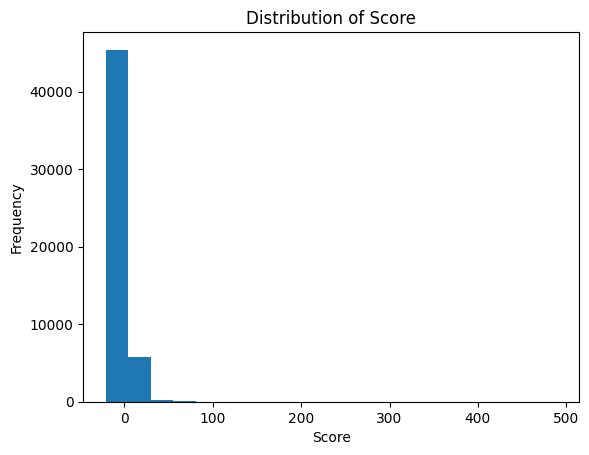

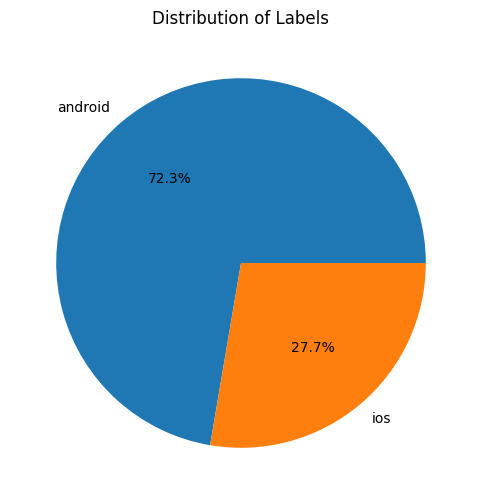

In [8]:
import matplotlib.pyplot as plt

# Histogram of 'Score' column
plt.hist(data_train['Score'], bins=20)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Pie chart of label distribution
plt.figure(figsize=(6, 6))
plt.pie(label_distribution, labels=label_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()


There are outliers in score

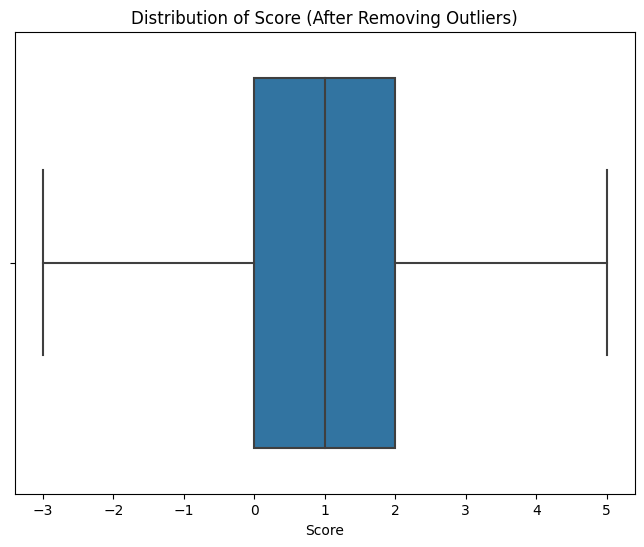

In [9]:
import seaborn as sns

# Define function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from 'Score' column
data_no_outliers = remove_outliers_iqr(data_train, 'Score')

# Visualize distribution of 'Score' after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_no_outliers['Score'])
plt.title('Distribution of Score (After Removing Outliers)')
plt.xlabel('Score')
plt.show()


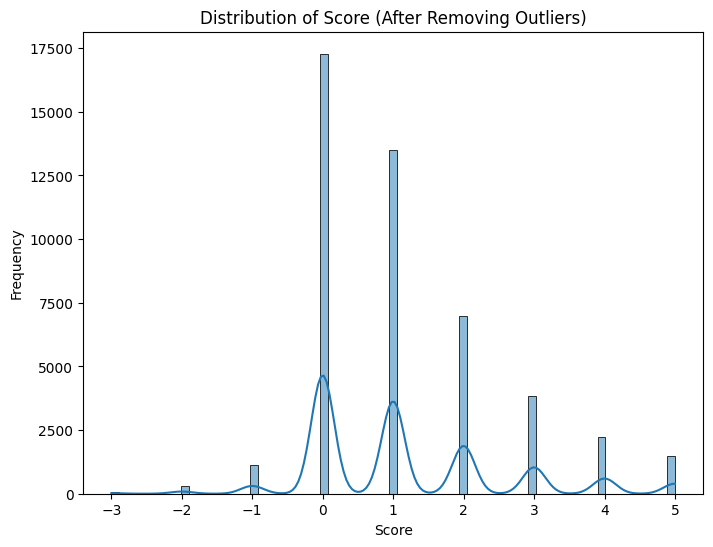

In [10]:
# Visualize distribution of 'Score' using histogram
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['Score'], kde=True)
plt.title('Distribution of Score (After Removing Outliers)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Compute text length
data_train['Title_Length'] = data_train['Title'].apply(lambda x: len(x.split()))
data_train['Body_Length'] = data_train['Body'].apply(lambda x: len(x.split()))

# Summary statistics for text length
print("Summary statistics for text length:")
print(data_train[['Title_Length', 'Body_Length']].describe())


Summary statistics for text length:
       Title_Length   Body_Length
count  51370.000000  51370.000000
mean       9.478061    102.689605
std        3.904807     97.652700
min        1.000000      5.000000
25%        7.000000     49.000000
50%        9.000000     78.000000
75%       12.000000    125.000000
max       33.000000   3344.000000


In [12]:
from collections import Counter

# Word frequency analysis for Title
title_words = ' '.join(data_train['Title']).split()
title_word_counts = Counter(title_words)
print("Most common words in titles:")
print(title_word_counts.most_common(10))

# Word frequency analysis for Body
body_words = ' '.join(data_train['Body']).split()
body_word_counts = Counter(body_words)
print("Most common words in bodies:")
print(body_word_counts.most_common(10))


Most common words in titles:
[('to', 19304), ('How', 10957), ('on', 10570), ('the', 9143), ('I', 8386), ('a', 7817), ('in', 7001), ('my', 6974), ('from', 5172), ('Android', 5146)]
Most common words in bodies:
[('the', 212450), ('to', 174966), ('I', 156993), ('and', 98731), ('a', 95964), ('my', 77065), ('it', 69883), ('is', 69234), ('on', 56124), ('in', 50933)]


In [17]:
from wordcloud import WordCloud

# Concatenate all titles into a single string
titles_text = ' '.join(data_train['Title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Title Column')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
px.pie(data_train, 'Label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'Label=%{label}<extra></extra>',
              'labels': array(['android', 'android', 'android', ..., 'android', 'android', 'ios'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [ ]:
px.histogram(data_train, x='Score', range_x=[-5, 50], color='Label')

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Label=android<br>Score=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'android',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'android',
              'offsetgroup': 'android',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([0, 0, 1, ..., 2, 1, 4], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Label=ios<br>Score=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'ios',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'ios',
              'offsetgroup': 'ios',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 5,  1,  2, ...,  0,  3, 11], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Label'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'range': [-5, 50], 'title': {'text': 'Score'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [ ]:
px.scatter(data_train, x='Score', y='ViewCount', color='Label', log_y=True, marginal_y='box', range_x=[-20, 200])

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Label=android<br>Score=%{x}<br>ViewCount=%{y}<extra></extra>',
              'legendgroup': 'android',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'android',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([0, 0, 1, ..., 2, 1, 4], dtype=int64),
              'xaxis': 'x',
              'y': array([  34,  836,   28, ..., 3799,  131, 4179], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Label=android<br>ViewCount=%{y}<extra></extra>',
              'legendgroup': 'android',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'name': 'android',
              'notched': True,
              'offsetgroup': 'android',
              'showlegend': False,
              'type': 'box',
              'xaxis': 'x2',
              'y': array([  34,  836,   28, ..., 3799,  131, 4179], dtype=int64),
              'yaxis': 'y2'},
             {'hovertemplate': 'Label=ios<br>Score=%{x}<br>ViewCount=%{y}<extra></extra>',
              'legendgroup': 'ios',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'ios',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([ 5,  1,  2, ...,  0,  3, 11], dtype=int64),
              'xaxis': 'x',
              'y': array([220250,     70,    127, ...,     96,   2258,  89411], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Label=ios<br>ViewCount=%{y}<extra></extra>',
              'legendgroup': 'ios',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'name': 'ios',
              'notched': True,
              'offsetgroup': 'ios',
              'showlegend': False,
              'type': 'box',
              'xaxis': 'x2',
              'y': array([220250,     70,    127, ...,     96,   2258,  89411], dtype=int64),
              'yaxis': 'y2'}],
    'layout': {'legend': {'title': {'text': 'Label'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.7363], 'range': [-20, 200], 'title': {'text': 'Score'}},
               'xaxis2': {'anchor': 'y2',
                          'domain': [0.7413, 1.0],
                          'matches': 'x2',
                          'showgrid': False,
                          'showline': False,
                          'showticklabels': False,
                          'ticks': ''},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'ViewCount'}, 'type': 'log'},
               'yaxis2': {'anchor': 'x2',
                          'domain': [0.0, 1.0],
                          'matches': 'y',
                          'showgrid': True,
                          'showticklabels': False,
                          'type': 'log'}}
})

### Textual Analysis

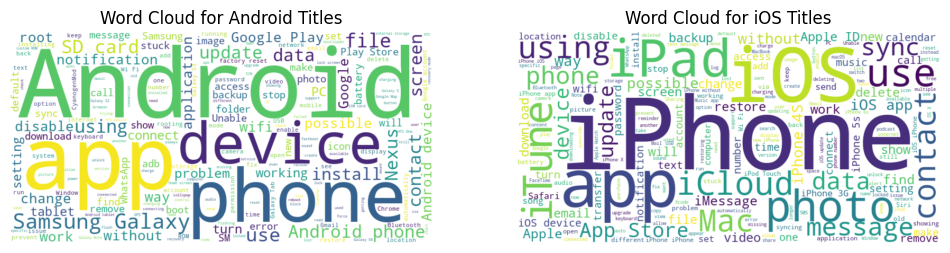

In [ ]:
# Separate data by label
android_data = data_train[data_train['Label'] == 'android']
ios_data = data_train[data_train['Label'] == 'ios']

# Generate word clouds for Android and iOS titles
android_titles_text = ' '.join(android_data['Title'])
ios_titles_text = ' '.join(ios_data['Title'])

android_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(android_titles_text)
ios_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ios_titles_text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(android_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Android Titles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ios_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for iOS Titles')
plt.axis('off')

plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data_train['Title'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()


Topic 1:
galaxy samsung google wifi does android work doesn network internet

Topic 2:
app android device apple ios music does keyboard change htc

Topic 3:
android data phone contacts device account using adb sync file

Topic 4:
iphone screen phone lock messages notification text android sms usb

Topic 5:
ios apps app card android play sd google iphone store



Topic 1: Connectivity and Network Issues (Android):

This topic includes terms related to connectivity and network problems commonly experienced by Android users, such as issues with Wi-Fi, internet, and network connectivity.
Topic 2: App and Device Management (Android and iOS):

This topic covers terms related to managing apps and devices, including topics like app installation, device compatibility, and keyboard settings. It appears to encompass aspects relevant to both Android and iOS platforms.
Topic 3: Data Management and Synchronization (Android):

This topic focuses on data management and synchronization tasks associated with Android devices. It includes terms related to managing phone data, syncing contacts, and using tools like ADB (Android Debug Bridge).
Topic 4: Device Operations and Notifications (Android and iOS):

This topic discusses various device operations and notifications, including tasks like locking the screen, receiving text messages, and handling notifications. These operations are relevant to both Android and iOS platforms.
Topic 5: App Store and Application Management (iOS and Android):

This topic revolves around app store-related terms and application management tasks, including topics like installing apps, using app stores (e.g., Google Play, App Store), and managing storage space with SD cards. It appears to encompass aspects relevant to both iOS and Android platforms.


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



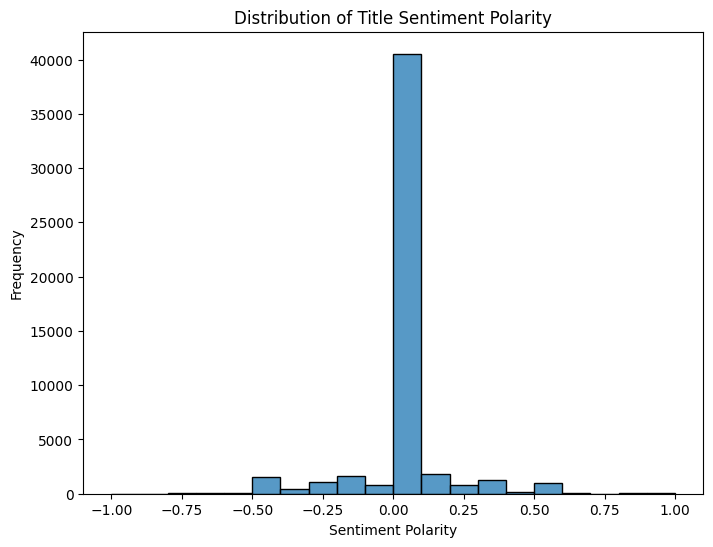

In [ ]:
from textblob import TextBlob

# Compute sentiment polarity for each title
data_train['Title_Sentiment'] = data_train['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot distribution of sentiment polarity
plt.figure(figsize=(8, 6))
sns.histplot(data_train['Title_Sentiment'], bins=20)
plt.title('Distribution of Title Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


## Data Preprocessing 

In [ ]:
# Check for duplicates
duplicate_rows = data_train[data_train.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


In [ ]:
# Check for null values
null_values = data_train[data_train.isnull().any(axis=1)]
print("Rows with null values:")
print(null_values)


Rows with null values:
Empty DataFrame
Columns: [Id, Title, Body, Score, ViewCount, Label, LabelNum, Title_Length, Body_Length, Title_Sentiment]
Index: []
